# 노인 교육

In [60]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 교육
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"인천시, 휴머니튜드 전문교육자 양성…""치매 돌봄 특별시 조성""",https://www.news1.kr/articles/4785408
1,"대구 달성군, 노인대학 옥포읍 순회교육",https://www.dnews.co.kr/uhtml/view.jsp?idxno=2...
2,"인천시, 인천형 노인일자리 발굴 TF 구성",https://www.kyeonggi.com/article/20220828580149
3,"강진군, 노인심리상담전문가 양성",http://www.namdonews.com/news/articleView.html...
4,"도노인회, ‘2022 노인자원봉사 활성화 수행기관 실무차 회의’ 개최",http://www.kwnews.co.kr/page/view/202208281547...
...,...,...
995,"대한노인회 전남 장흥군지회, 신임 경로당 회장 역량 강화 교육 실시",http://www.100ssd.co.kr/news/articleView.html?...
996,사회복지 종사자 노인인권교육,https://www.cctoday.co.kr/news/articleView.htm...
997,경남경찰청 노인대학 어르신 교통 안전교육,http://www.gndomin.com/news/articleView.html?i...
998,"천안시, 노인맞춤돌봄서비스 종사자 역량 강화 교육 실시",https://www.gukjenews.com/news/articleView.htm...


In [61]:
noin = news_df.copy()

In [62]:
import re
target = noin['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
#text

In [86]:
noin['title'].unique()

array(['인천시, 휴머니튜드 전문교육자 양성…"치매 돌봄 특별시 조성"', '대구 달성군, 노인대학 옥포읍 순회교육',
       '인천시, 인천형 노인일자리 발굴 TF 구성', '강진군, 노인심리상담전문가 양성',
       '도노인회, ‘2022 노인자원봉사 활성화 수행기관 실무차 회의’ 개최', '인천시, 노인일자리 발굴위해 전담팀 구성',
       "충북 노인 학대 최다 가해자는 '기관'…암수범죄 우려", '김해 독거노인 80%가 매일 부르는 그 이름 "아리아~"',
       '부영 우정교육문화재단, 외국인 유학생 85명에 장학금 3억 지원',
       '순천소방서여성의용소방대, 노인 돌봄 서비스 펼쳐', '부유하고 교육받은 백인일수록 ‘존엄사’를 원했다',
       '마포구약, 노인종합복지관서 정기 교육 전개키로', '사천시니어클럽, 2022년 노인일자리 참여자 직무교육 실시',
       '군위군 복지공무원 빠른 대처… 뇌경색 증상 독거노인 구해', '강진군, 노인심리상담전문가 양성에 앞장서',
       '광양노인복지관, 웰다잉 인식교육', '함안경찰서, 찾아가는 노인 교통안전 교육',
       '발달장애인 5명 아픈 노인 돌보는 요양보호사 됐다', '논산소방서 어르신 대상 소방안전교육',
       '광양시 보건진료소, 남성노인 전립선비대증 등 예방교육 실시',
       '대구시 달성군청, 노인대학에서 어르신들 활기찬 노후생활 유지 교육 실시',
       '대한노인회 강원 평창군지회, 2022년 노인지도자 연찬회 개최', '연동의용소방대 노인돌봄서비스 실시',
       '지역주민이 위기 가구 발굴… “매뉴얼-교육 없어” 실효성 ‘글쎄’', '무주노인종합복지관 노인맞춤돌봄서비스 영양교육',
       '부영그룹 우정교육문화재단, 33개국 85명 외국인 유학생 장학금 지급',
       '노인 생활정보를 한 권에… 서귀포시, 안내서 배포', '대한노인회 전남 광양시지회, 남성어르신을 위한 요리교실 진행'

In [81]:
pd.set_option('display.max_row', 500)

In [138]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =['키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','키오스크','자영업자']
stop_word = ['노인','생활','교육','실시','복지관','사업','어르신','대상',
'안전교육',
 '참여자',
 '예방',
 '복지',
 '지원',
 '운영',
 '프로그램',
 '맞춤',
 '경로당',
 '서비스',
 '센터',
 '종합',
 '시설',
 '진행',
 '활동',
 '모집',
 '강화',
 '개최',
 '협약',
 '충북',
 '추진',
 '대구',
 '봉사',
 '기관',
 '지역',
 '수강생',
 '업무',
 '소비자',
 '하반기',
 '계층',
 '학교',
 '대학',
 '클럽',
 '피해',
 '문화재단',
'교실',
 '취약',
 '기업은행',
 '진흥',
 '현장',
 '행복',
 '관리',
 '보건소',
 '경기도',
 '광주시',
 '마을',
 '광주',
 '방역',
 '개강',
 '소식',
 '체결',
 '교육청',
 '부산',
 '재단',
 '충남',
 '경기',
 '요양',
 '인천',
 '보건',
 '울산',
 '시민',
 '나눔',
 '임실군',
 '장학금',
 '여성',
 '경찰서',
 '가족',
 '교육과정',
 '회장',
 '발전',
 '통합',
 '프로젝트',
 '서기',
 '진천군',
 '장애인',
 '오스',
 '수료식',
 '안심',
 '전문',
 '충주시',
 '과정',
 '지킴',
 '혁신',
 '한국',
 '제주',
 '참여',
 '연합',
 '병원',
 '순회',
 '부영',
 '우정',
'체험',
 '유학생',
 '서귀포시',
 '전북',
 '고령자',
 '개선',
 '종사',
 '제공',
 '화웨이',
 '기부',
 '서산시',
 '외국인',
 '요양보호사',
 '강원',
 '전남',
 '순창군',
 '대전',
 '온라인',
 '호응',
 '개발',
 '동아리',
 '창원',
 '폭염',
 '협력',
 '청소년',
 '협회',
 '파트너',
 '직무',
 '군위군',
 '노인학',
 '완주군',
 '무료',
 '청도군',
 '정보화',
 '합천군',
 '보호',
 '서구',
 '성남',
 '조치',
 '원사',
 '방문',
 '자원봉사',
 '수행',
 '사단',
 '군산',
 '고양시',
 '고령',
 '공단',
 '화성시',
 '경북',
 '타운',
 '경남',
 '서울',
 '민주주의',
 '어린이',
 '제천시',
 '운영자',
 '본부',
 '티웨이항공',
 '승무원',
 '대비',
 '구강',
 '협의',
 '실버',
 '예산군',
 '양산',
 '문해',
 '국도',
 '증진',
 '공무원',
 '그룹',
 '구축',
 '시범',
 '은행',
 '참석',
 '동구',
 '순천시',
 '고창군',
 '코로나',
 '상주',
 '시니어',
 '지도자',
 '의창',
 '춘천',
 '실천',
 '행사',
 '하나',
 '헥톤',
 '교육지원청',
 '부안군',
 '치유',
 '소외',
 '양산시',
 '하모니',
 '전국',
 '노인장',
 '발굴',
 '의용소방대',
 '정기',
 '노후',
 '환자',
 '이상',
 '함양군',
 '기탁',
 '톡톡',
 '관내',
 '산시',
 '군산시',
 '관리소',
 '청도',
 '동구청',
 '시행',
 '학습',
 '활용',
 '전달',
 '사랑',
 '도서관',
 '부안',
 '역할',
 '간담',
 '북부',
 '장학',
 '고승',
 '본격',
 '남해',
 '홍성군',
 '위해',
 '찬회',
 '주민',
 '지급',
 '선정',
 '소득',
 '해외',
 '법례',
 '울진군',
 '실태',
 '조사',
 '인성',
 '연구원',
 '예산',
 '광역시',
 '태안군',
 '공주시',
 '마무리',
 '서대문구',
 '수용',
 '전략',
 '빛고을',
 '세대',
 '아빠',
 '인지',
 '남부',
 '시립',
 '결혼',
 '이민자',
 '군수',
 '천안시',
 '서밋',
 '급식',
 '촉진',
 '청주',
 '소방본부',
 '서부',
 '체계',
 '태안',
 '생명',
 '심화',
 '정읍',
 '진안',
 '아동',
 '질환',
 '학기',
 '중구',
 '삼육보건대',
 '간호조무사',
 '강사',
 '북구',
 '묵호',
 '경일대',
 '김경',
 '교수',
 '성인',
 '경주시',
 '발대식',
 '인사',
 '달성군',
 '웰다잉',
 '인식',
 '광양시',
 '진료',
 '개국',
 '무주군',
 '의치',
 '보철',
 '박사',
 '의회',
 '대창',
 '만원',
 '홀로',
 '눈길',
 '보은군',
 '청운대',
 '산업',
 '교통사고',
'농협',
 '김제',
 '평생',
 '홀몸',
 '오픈',
 '용법',
 '맑음',
 '국회',
 '확대',
 '로컬',
 '농산물',
 '노년',
 '특강',
 '청원구',
 '변화',
 '마련',
 '강조',
 '회원',
 '괴산군',
 '홍성',
 '교육장',
 '자격증',
 '금산',
 '중년',
 '곡성군',
 '약학',
 '확산',
 '일부',
 '원장',
 '임명',
 '서산',
 '우수',
 '공사',
 '사고',
 '대회',
 '미래',
 '증축',
 '남면',
 '창립',
 '주년',
 '대응',
 '특별',
 '여름방학',
 '수원시',
 '강서동',
 '성폭력',
 '임원',
 '고령화',
 '강동구',
 '기념',
 '제전',
 '금연',
 '은빛',
 '동화',
 '구연',
 '의원',
 '전문화',
 '세종',
 '경찰',
 '입상',
 '감염병',
 '배꽃',
 '천단',
 '디자인',
 '가북면',
 '조성',
 '구성',
 '회의',
 '전담',
 '대처',
 '광양',
 '함안',
 '달성',
 '평창군',
 '무주',
 '영양',
 '군민',
 '만학',
 '성과',
 '순위',
 '피해자',
 '이서면',
 '함양',
 '진입',
 '대책',
 '도로',
 '스마트',
 '뉴스',
 '영화',
 '강연',
 '일산서구',
 '배움터',
 '올해',
 '증가',
 '직원',
 '기금',
 '천만원',
 '사천시',
 '나이',
 '가라',
 '지금',
 '타임',
 '창녕군',
 '양질',
 '울진',
 '경쟁',
 '가치',
 '팩토리',
 '소개',
 '동정',
 '동두천시',
 '계획',
 '폐교',
 '심폐소생술',
 '진안군',
 '복합',
 '건보',
 '전라',
 '복약',
 '의약품',
 '봉사활동',
 '응급',
 '여름철',
 '영암군',
 '금호동',
 '영등포구',
 '울진읍',
 '데이',
 '케어',
 '노력',
 '전문가',
 '칼럼',
 '일산',
 '격차',
 '해소',
 '정책',
 '중단',
 '보건복지부',
 '연속',
 '청주시',
 '흥덕',
 '학과',
 '강원도',
 '사례',
 '봉화',
 '괴산',
 '산실',
 '자연',
 '평가',
 '의정부시',
 '단체',
 '이용',
 '봉화군',
 '전주시',
 '회관',
 '부동',
 '사회보장',
 '기고',
 '서울시',
 '인공',
 '덕계동',
 '구리시',
 '거제',
 '요양원',
 '제주도',
 '청소',
 '경주시보건소',
 '남구',
 '불법',
 '정차',
 '통해',
 '삼척시',
 '동두천',
 '담양군',
 '다미',
 '갤러리',
 '카페',
 '김천시',
 '문화원',
 '동대문구',
 '취임식',
 '인형',
 '마음',
 '희망',
 '운전면허',
 '채용',
 '낙상',
 '백운면',
 '학습자',
 '수료',
 '화재',
 '서산의료원',
 '이화여대',
 '중생',
 '공학',
 '강북',
 '취임',
 '수상',
 '애인',
 '경찰청',
 '교육부',
 '바리스타',
 '김천',
 '부항',
 '계룡시',
 '평등',
 '나주시',
 '경력',
 '단절',
 '창업',
 '강진군',
 '상담전문가',
 '실무',
 '가해자',
 '김해',
 '존엄사',
 '전개',
 '남성',
 '대구시',
 '유지',
 '위기',
 '가구',
 '정보',
 '의성',
 '도우미',
 '이화여자대',
 '스포츠',
 '지도사',
 '익산',
 '성생활',
 '논문',
 '의장',
'시영',
 '우리',
 '최고',
 '등재',
 '후보',
 '학술지',
 '우뚝',
 '정부',
 '매년',
 '의무',
 '절반',
 '목전',
 '햄버거',
 '인간',
 '가지',
 '유형',
 '양성평등',
 '연제구',
 '임원진',
 '구미시',
 '다음',
 '정기석',
 '엉망',
 '상지대',
 '사태',
 '이후',
 '사망자',
 '상반기',
 '크게',
 '일동',
 '속보',
 '표적',
 '효과',
 '의문',
 '통합교육',
 '설계',
 '허약',
 '서원',
 '예비',
 '오피스',
 '가드',
 '자격',
 '초등생',
 '검사',
 '신풍동',
 '지난',
 '최선',
 '인제군',
 '국가',
 '내달',
 '필요',
 '젊은이',
 '유등',
 '정착',
 '최재훈',
 '아카데미',
 '네트워크',
 '의정부',
 '여름',
 '관련',
 '임대주택',
 '영동',
 '연수',
 '탄소',
 '전시',
 '유성구',
 '진자',
 '감염',
 '보령',
 '동부',
 '장기',
 '중랑구',
 '삼계탕',
 '군포시',
 '고양',
 '인구',
 '거제시',
 '함안군',
 '하서면',
 '분야',
 '군위',
 '충주',
 '영등포',
 '자살',
 '지자체',
 '시스템',
 '아이디어',
 '공모전',
 '접수',
 '완료',
 '소규모',
 '부평구',
 '발표회',
 '준비',
 '스님',
 '주요',
 '입법',
 '튜터',
 '대학교',
 '전공',
 '취득',
 '성주군',
 '파티마',
 '효령',
 '수영장',
 '건립',
 '향상',
 '고객',
 '자녀',
 '웅상',
 '언론',
 '용품',
 '오늘',
 '진주시',
 '초장동',
 '종합병원',
 '창원시',
 '정읍시',
 '단독',
 '국민은행',
 '광교',
 '고창',
 '한씨',
 '오프라인',
 '혼합',
 '유네스코',
 '패러다임',
 '보고',
 '이완섭',
 '경산시',
 '성공',
 '상주시',
 '외로움',
 '유기견',
 '분양',
 '시대',
 '설립',
 '간병',
 '자립',
 '신임',
 '핵심',
 '환경운동가',
 '중심',
 '시뮬레이션',
 '화남면',
 '주목',
 '도내',
 '양주시',
 '치과',
 '하절',
 '동행',
 '금산군',
 '동해',
 '위험',
 '칠곡군',
 '수확',
 '옥수수',
'남궁',
 '캠페인',
 '도담',
 '세상',
 '고등학교',
 '발생',
 '당진시',
 '양평군',
 '공익',
 '행정',
 '실현',
 '남동',
 '영흥',
 '탄회',
 '친환경',
 '성동구',
 '노하우',
 '벤치마킹',
 '선배',
 '입학식',
 '특례시',
 '여수시',
 '특별자치도',
 '부부',
 '연일',
 '배식',
 '활기',
 '직산',
 '시험',
 '화전',
 '반려',
 '무더기',
 '전남도',
 '장난감',
 '수리',
 '버스',
 '구입',
 '감사',
 '성산',
 '승강기',
 '음성군',
 '일단',
 '하소',
 '퇴촌면',
 '장성',
 '상호',
 '결핵',
 '검진',
 '노인성',
 '만성',
 '방지',
 '보라매병원',
 '거창',
 '거창군',
 '용인시',
 '처인구',
 '강화군',
 '특별시',
 '옥포',
 '활성화',
 '학대',
 '암수범죄',
 '우려',
 '매일',
 '이름',
 '아리아',
 '백인',
 '마포',
 '구약',
 '뇌경색',
 '증상',
 '구해',
 '발달장애',
 '논산',
 '전립선비대증',
 '군청',
 '연동',
 '매뉴얼',
 '실효',
 '글쎄',
 '안내서',
 '배포',
 '안양시',
 '바디',
 '플라워',
 '수원',
 '지정',
 '헬스장',
 '시사',
 '난장',
 '신체',
 '기능',
 '이용자',
 '영향',
 '송파구',
 '박경',
 '주관',
 '우리나라',
 '방향',
 '판암',
 '태화동',
 '안양',
 '주거',
 '천만',
 '수원여대',
 '단양',
 '단양군',
 '과목',
 '정기영',
 '계장',
 '구역',
 '약자',
 '조물',
 '식도락',
 '볶음',
 '합천',
 '노출',
 '중앙',
 '수립',
 '춘해보건대',
 '명지전문대',
 '포천',
 '가까이',
 '나기',
 '김치',
 '삼문동',
 '보조금',
 '정산',
 '귀감',
 '부여',
 '인세',
 '수도권',
 '관계자',
 '재난',
 '화성',
 '청렴',
 '인증',
 '마늘',
 '공급',
 '배기',
 '비중',
 '위중',
 '다소',
 '감소',
 '깜짝',
 '홍천군',
 '기반',
 '아라뱃길',
 '지사',
 '중요',
 '영화로',
 '그린',
 '보급',
 '금성면',
 '구룡',
 '기기',
 '부지',
 '투여',
 '아세트아미노펜',
 '성분',
 '해열제',
 '부족',
 '이창호',
 '선임',
 '김해시',
 '특성',
 '티켓',
 '보기',
 '청리면',
 '사전',
 '죽음',
 '공부',
 '오히려',
 '몰락',
 '바다',
 '자랑',
 '개설',
 '대학생',
 '봉사자',
 '요리실',
 '동진면',
 '송두환',
 '위원장',
 '보장',
 '포용',
 '상황',
 '주정',
 '영암',
 '금정구',
 '장수',
 '료후',
 '공동',
 '작업장',
 '강남',
 '대한민국',
 '대표',
 '브랜드',
 '부문',
 '간소화',
 '남용',
 '후견인',
 '도구로',
 '황산면',
 '강서',
 '보수',
 '경복대',
 '위생',
 '예치',
 '김송',
 '고씨',
 '진드기',
 '사망',
 '활동가',
 '가스',
 '태백',
 '성황리',
 '합창단',
 '일산동구',
 '여개',
 '부처',
 '복지로',
 '목소리',
 '촘촘',
 '복지부',
 '홍보',
 '건국',
 '편입',
 '복지사',
 '가정사',
 '동시',
 '패키지',
 '극복',
 '선도',
 '스쿨존',
 '제한',
 '한수',
 '구청',
 '문화센터',
 '설명',
 '감수성',
 '진원',
 '사람',
 '인생',
 '스토리',
 '구술',
 '생애',
 '최신',
 '외국',
 '발간',
 '아이',
 '상대',
 '아동권리',
 '보호자',
 '대상자',
 '생리',
 '원금',
 '더위',
 '대림',
 '천진',
 '조선족',
 '어제',
 '안산',
 '드림',
 '스타트',
 '학령기',
 '사과',
 '수호천사',
 '교종',
 '인류',
 '지속',
 '도시',
 '북이면',
 '체조',
 '구로구',
 '인플레',
 '감축',
 '통과',
 '영주시',
'경산',
 '개소',
 '장안구',
 '소속',
 '향기',
 '나무',
 '인격',
 '형성',
 '죽곡',
 '몰리',
 '자영',
 '업자',
 '편의',
 '학년',
 '선교사',
 '얼굴',
 '집단',
 '사기',
 '흥덕면',
 '협동조합',
 '동양',
 '레이더',
 '다시',
 '나선',
 '폐지',
 '수집',
 '냉방',
 '바둑',
 '일도',
 '오금동',
 '진해',
 '리쿠',
 '다문화',
 '무릎',
 '관절',
 '수술',
 '매입',
 '살피',
 '모동면',
 '임시',
 '총회',
 '여론',
 '명분',
 '홍천',
 '영귀',
 '맹호',
 '수영구',
 '스위스',
 '대신',
 '선택',
 '팔달구',
 '대치',
 '신안',
 '우체국',
 '파산',
 '집착',
 '희생',
 '셀프',
 '서영아',
 '옥시',
 '가짜',
 '주장',
 '피의자',
 '사진',
 '도민',
 '아파트',
 '시작',
 '박상수',
 '도계',
 '점검',
 '행안부',
 '규제',
 '액티브',
 '친절',
 '죽곡면',
 '부산외국어대학교',
 '바탕',
 '융합',
 '교류',
 '영통구',
 '학술',
 '포럼',
 '워크샵',
 '봉양면',
 '손길',
 '호평',
 '인프라',
 '접근성',
 '꼴찌',
 '스카이라이프',
 '영업',
 '사은',
 '미끼',
 '중계',
 '영천시',
 '투맨',
 '삼척',
 '도계읍',
 '관광',
 '치아',
 '급증',
 '강릉',
 '근황',
 '공개',
 '선린대',
 '재학생',
 '인천광역시',
 '유아',
 '종이접기',
 '글쓰기',
 '정규',
 '인월면',
 '등급',
 '획득',
 '김진아',
 '금발',
 '신문',
 '자애',
 '덕양',
 '춘천인형극제',
 '관왕',
 '초인종',
 '부천',
 '사용',
 '관심',
 '상영',
 '만전',
'양양군',
 '밀착',
 '개그맨',
 '오정태',
 '간다',
 '김현주',
 '더봄',
 '고흥군',
 '점암면',
 '위촉',
 '화천군',
 '지지',
 '부진',
 '능력',
 '수분',
 '섭취',
 '휴식',
 '학성동',
 '동물복지',
 '무상급식',
 '인상',
 '오누이',
 '총력',
 '특화',
 '방안',
 '목장',
 '류창현',
 '익산시',
 '대피',
 '먼저',
 '창녕',
 '민간',
 '위탁',
 '수탁',
 '동한',
 '춘천시',
 '분기',
 '직장',
 '정자',
 '나주',
 '세종시',
 '이사회',
 '비대',
 '면화',
 '가속',
 '학당',
 '소크라테스',
 '자원봉사단',
 '강범석',
 '청장',
 '여건',
 '보행자',
 '관람',
 '경주',
'중풍',
 '이병기',
 '서로',
 '격려',
 '시간',
 '자원',
 '순환',
 '경영',
 '자원봉사자',
 '부안읍',
 '바로',
 '논산시',
 '신규',
 '택시',
 '잡기',
 '열차',
 '속수무책',
 '권익',
 '파주시',
 '의왕시',
 '내면',
 '근력',
 '시각장애인',
 '권역',
 '무협',
 '규칙',
 '경도',
 '인지장애',
 '도움',
 '장수군',
 '마이',
 '패밀리',]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
일자리,120
소방,52
안전,47
치매,46
건강,42
사회,40
디지털,31
독거,29
문화,29
금융,29


In [139]:
df[:100]

,cnt
일자리,120
소방,52
안전,47
치매,46
건강,42
사회,40
디지털,31
독거,29
문화,29
금융,29


In [140]:
df.index.to_list()

['일자리',
 '소방',
 '안전',
 '치매',
 '건강',
 '사회',
 '디지털',
 '독거',
 '문화',
 '금융',
 '교통',
 '평생교육',
 '역량',
 '인권',
 '양성',
 '인력',
 '소양',
 '키오스크',
 '성교육',
 '여가',
 '스마트폰',
 '예술',
 '의료',
 '공예',
 '회계',
 '정신건강',
 '역사',
 '만들기',
 '환경',
 '재무',
 '농업',
 '보이스피싱',
 '식생활',
 '취업',
 '간호',
 '심리',
 '실생활',
 '포토',
 '미디어',
 '푸드',
 '테크',
 '글로벌',
 '기술',
 '우울증',
 '대화',
 '기초과학',
 '취미',
 '주문',
 '반찬',
 '영화관',
 '힐링',
 '식단',
 '농기',
 '가정',
 '재활',
 '커피',
 '운동',
 '고혈압',
 '당뇨병',
 '지능',
 '말동무',
 '자영업자',
 '휴머니튜드',
 '전문교육',
 '요리',
 '응급처치',
 '말벗',
 '장비',
 '목공',
 '노래',
 '축산물',
 '포장',
 '반려동물',
 '도시농업',
 '학업',
 '가르침',
 '지식',
 '인간관계',
 '치료',
 '식사',
 '농촌',
 '농장',
 '식중독',
 '은퇴',
 '생활고',
 '일터',
 '알바',
 '로봇',
 '외국어',
 '트롯',
 '체육',
 '재배',
 '극단',
 '수영',
 '골프',
 '피아노',
 '상담',
 '플랫폼',
 '소통',
 '예약',
 '도시락',
 '빨래',
 '옥천군',
 '시화',
 '전서',
 '최기문',
 '영천시장',
 '시사회',
 '생수',
 '충북도',
 '게재',
 '교육자',
 '동서',
 '중립',
 '신현원창동',
 '강의',
 '불교',
 '정관',
 '주체',
 '기여',
 '이모저모',
 '대한의사협회',
 '창울',
 '이도영',
 '목포시',
 '차단',
 '이천',
 '부원',
 '방법',
 '부산시',
 '제주시',
 '마산',
 '일자',


In [124]:
df[:500]

,cnt
일자리,120
소방,52
안전,47
치매,46
건강,42
사회,40
디지털,31
독거,29
문화,29
금융,29


In [141]:
df.cnt.unique()

array([120,  52,  47,  46,  42,  40,  31,  29,  27,  24,  23,  22,  17,
        16,  14,  13,  11,  10,   9,   8,   7,   6,   5,   4,   2,   1])

In [113]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기
len(df_test)

21

In [114]:
df_stop_words = df_test
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,일자리,120
1,소방,52
2,안전,47
3,치매,46
4,건강,42
5,사회,40
6,디지털,31
7,독거,29
8,문화,29
9,금융,29


In [142]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 2999.5, 3999.5, -0.5)

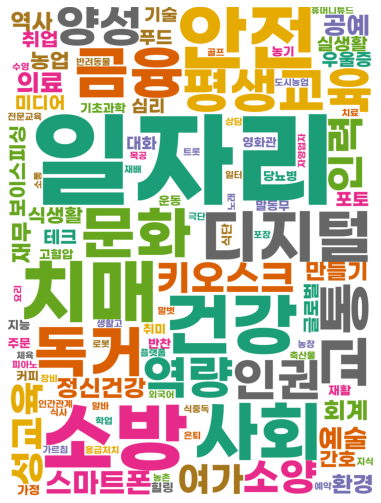

In [148]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 3000, 
                      height = 4000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (9, 9))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기